# Prediction and Inference

Importing dataset onto a dataframe

In [1]:
import pandas as pd
df = pd.read_csv(r"/home/captainahd/Desktop/github/AI-ML/Prediction and Inference/housing.csv")

In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Check for null values

In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Now we will have to remove the null values, there are many ways to do so but here we will try a simples approach and replace all null values with mean

In [6]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [7]:
df.isna().sum() #done

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Handling categorical variables

In [8]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
df['ocean_proximity'].replace({'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}, inplace=True)

## Prediction and Inference
Before I begin, I would like to define what prediction and inference mean. On top of that I would like to highlight how they differ and how to prioritize model selection based on what our need is.
Let's say we have a equation:
                                y = f(x) + /Epsilon 
Clearly, the equation says that y depends on a combination of f(x) and /Epsilon. Since /Epsilon is a constant (residual), we will ignore it and just focus on two terms, y and f(x). Now we know that y's value for any value of x will be determined by the function 'f.'

Whatever, value we get of 'y' is the prediction and the 'f' is the inference.

Formally, we can define both as following. 
1. Prediction: For every function the output is the prediction for a given equation(whatever value the function spits out).
2. Inference: The relation between x and y as defined by the f around x. 

When it comes to prediction and a model, the metric that we're concerned with to evaluate performance is accuracy. However, when it comes to inference, the metric that we're concerned with is the interpretability of the model.

Now any model that can learn non-linear and complex relationships within the data will have higher accuracy, but it will be difficult to interpret. On the other hand, a simpler model that cannot do so will in some circumstances will have lower accuracy, but it will be easier to interpret. 

So depending upon our requirement, we need to do a trade-off between the two. If we want to have a model that is easy to interpret, we will have to sacrifice accuracy. On the other hand, if we want to have a model that has high accuracy, we will have to sacrifice interpretability. This varies from problem to problem and we need to be aware of this trade-off. Our need will not always be fulfilled with a sophisticated model. 

For example, we will be using the california housing dataset. Here, we have two needs, one would be to understand the relationship between the features (location, bedrooms, etc.) and the target variable (price) and the other would be to predict the price of the house to check whether a given listing is over-priced or underpriced.
So accordingly we will be using various models. And later on decide which suits our need the best.

In [10]:
# To understand the relationships between the features and the target, we can use the corr() method to compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes.
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,0.180381
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,-0.067586
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,-0.204882
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,0.014818
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,0.004060
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.008511
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.016911
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.129135
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,-0.210600
ocean_proximity,0.180381,-0.067586,-0.204882,0.014818,0.004060,-0.008511,-0.016911,-0.129135,-0.210600,1.000000


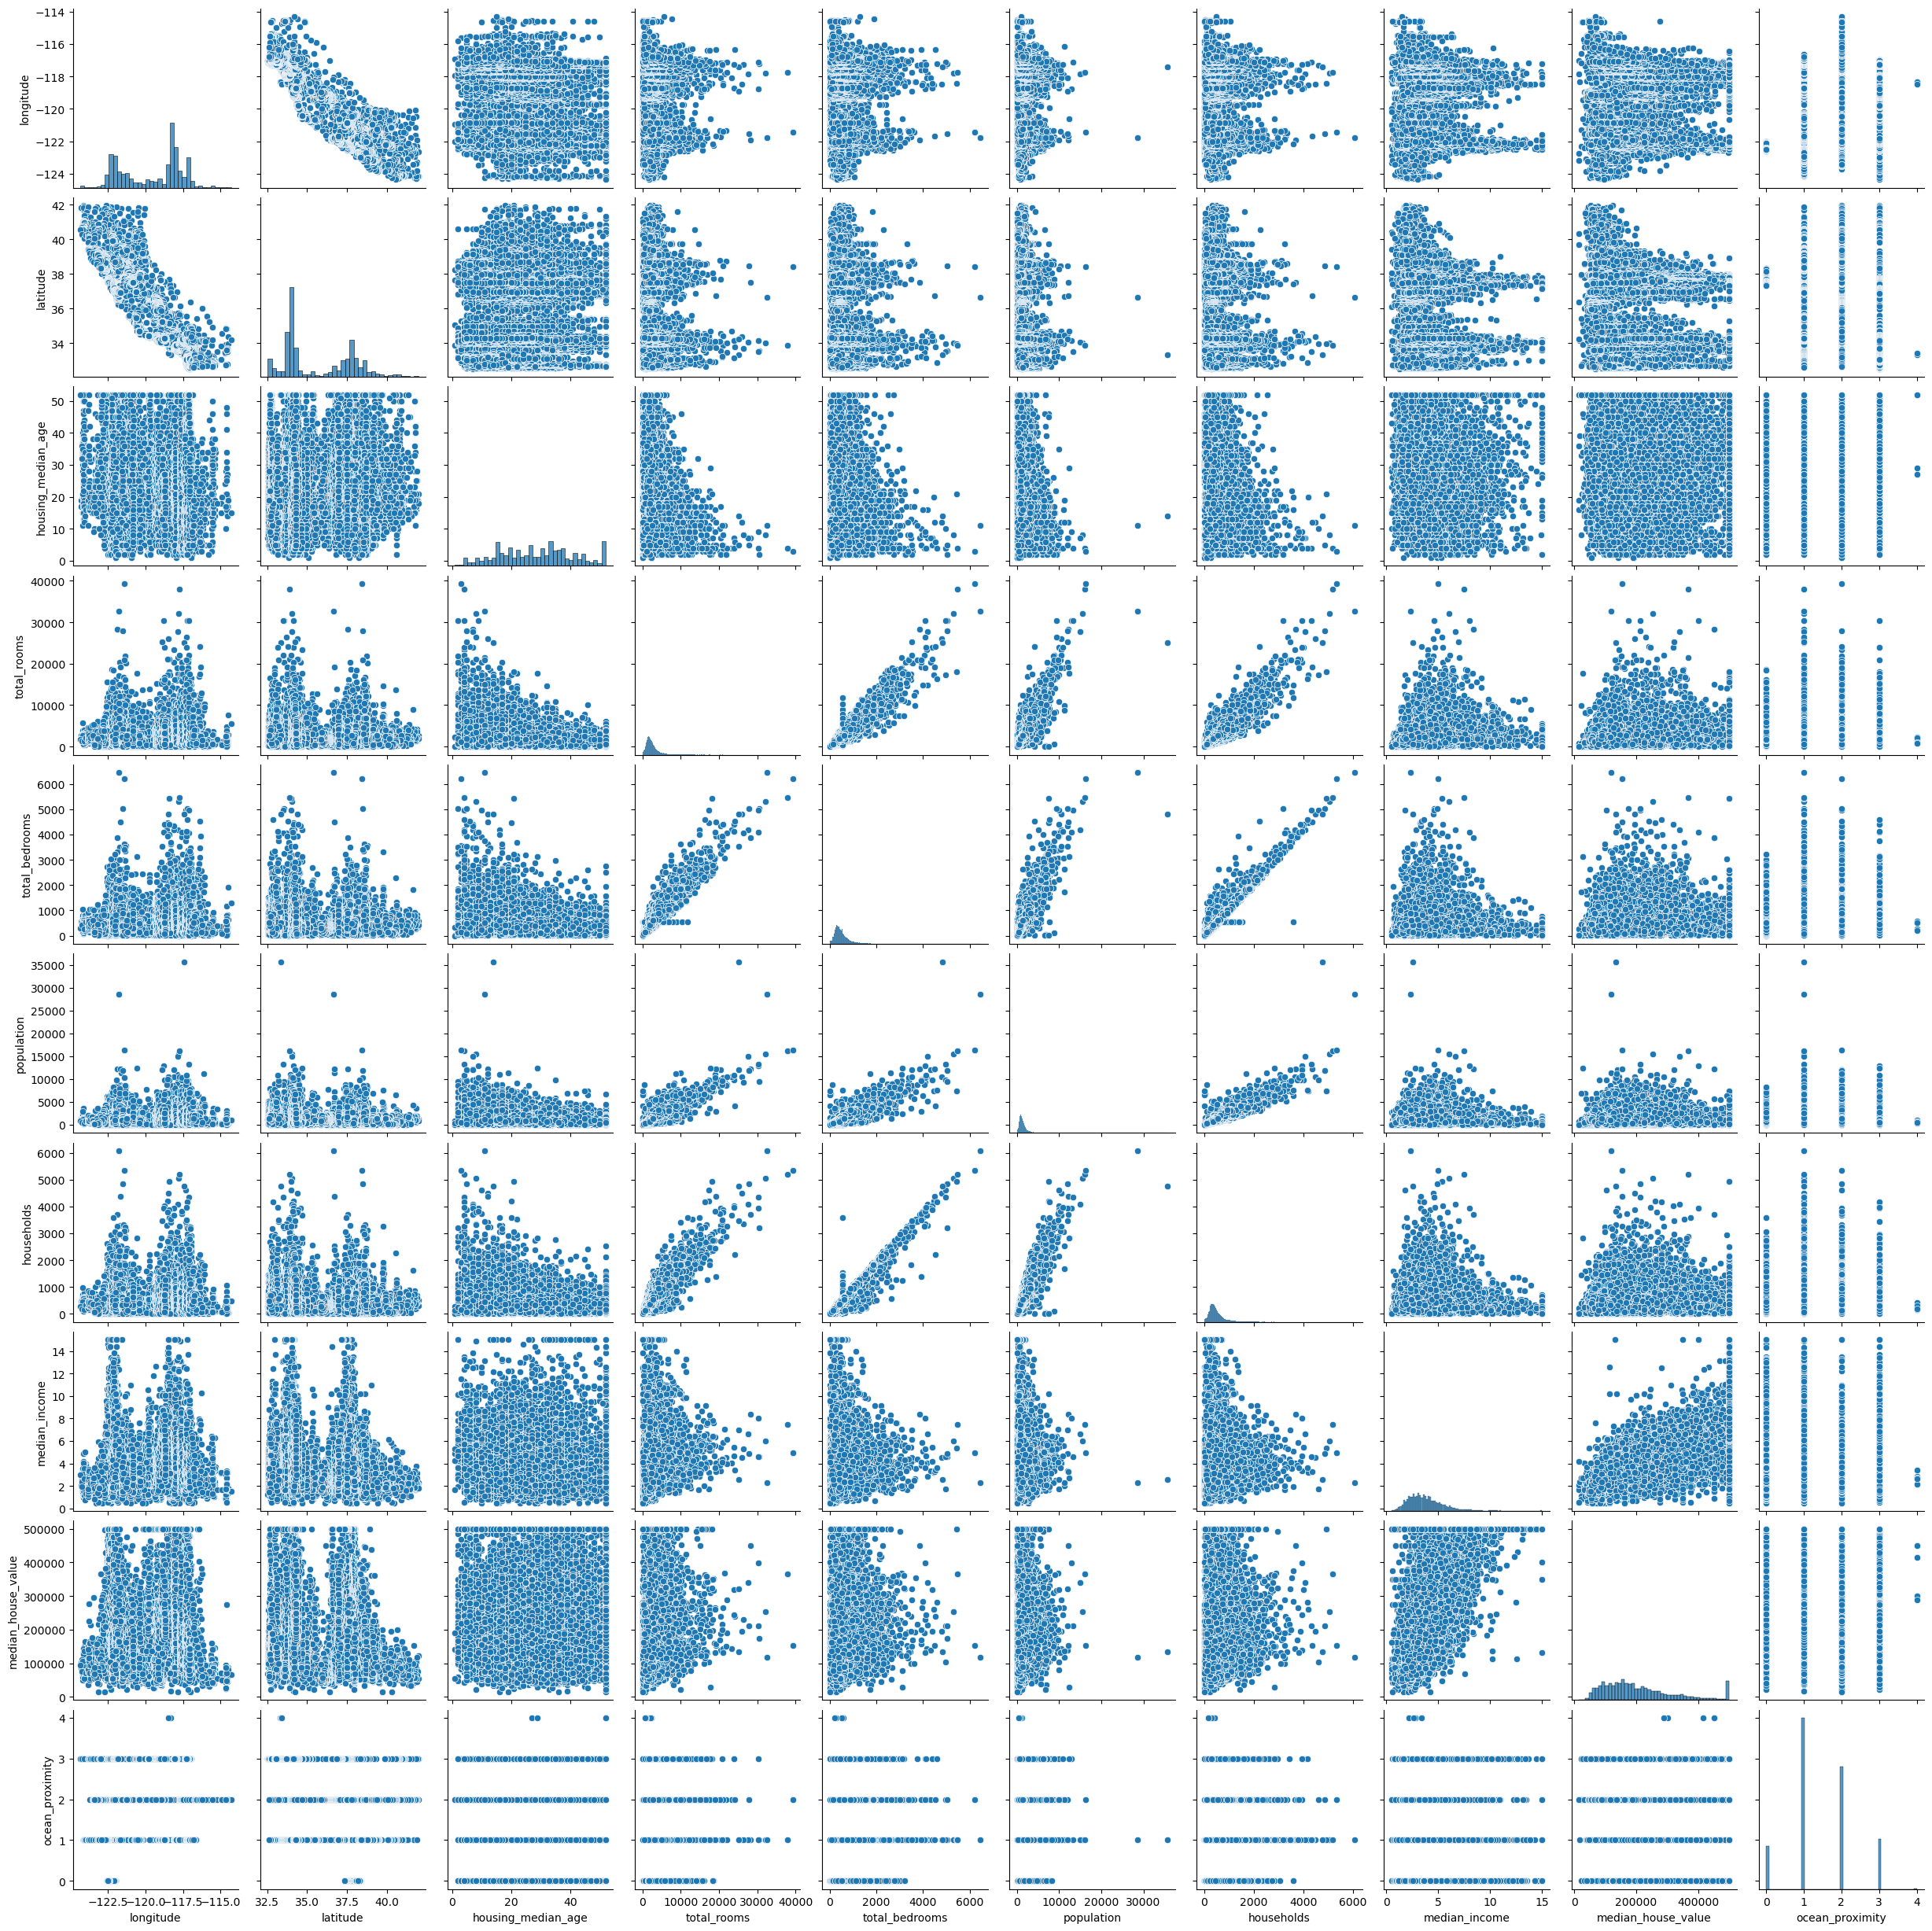

In [11]:
#we can also plot this correlation matrix using the seaborn library
import seaborn as sns
sns.pairplot(df)

<AxesSubplot: >

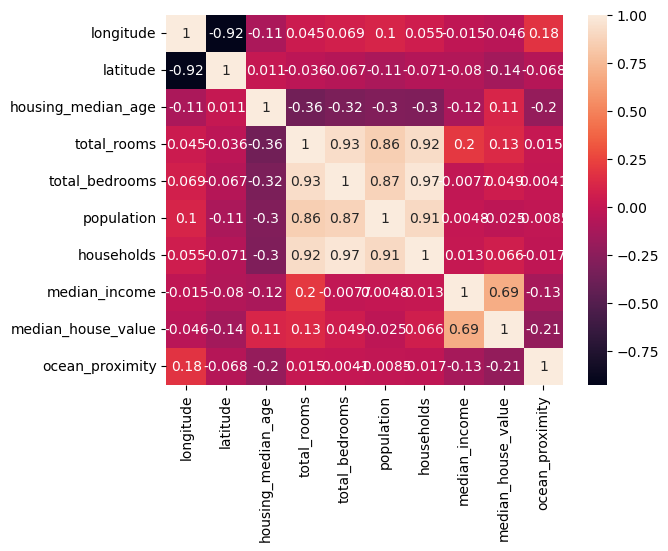

In [12]:
#another way would be to create a heatmap
sns.heatmap(df.corr(), annot=True)

Now, let's specifically check the relationship with y (median house value)

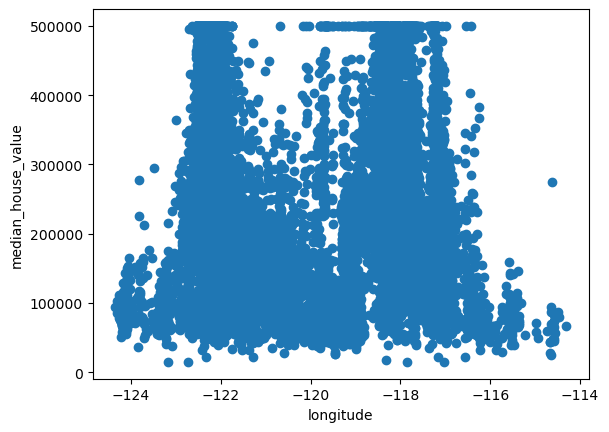

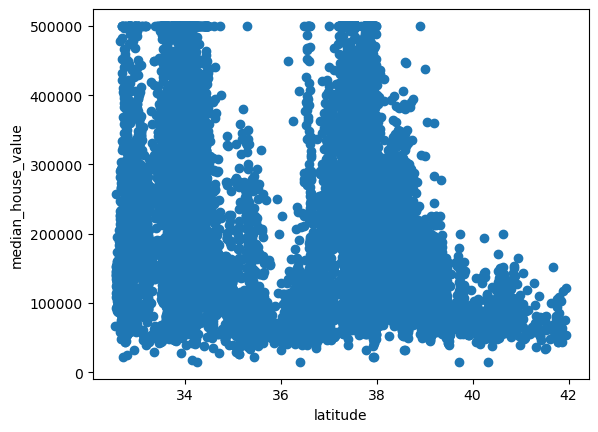

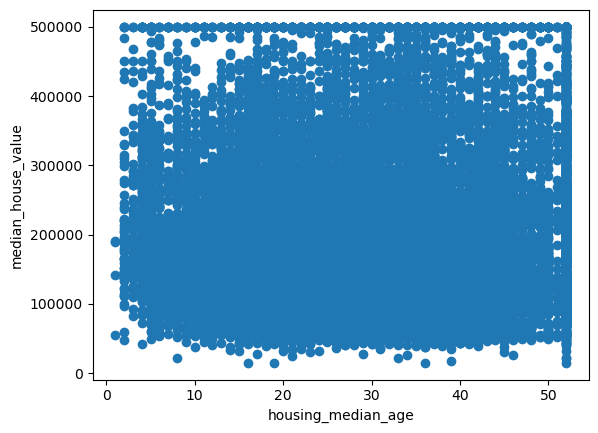

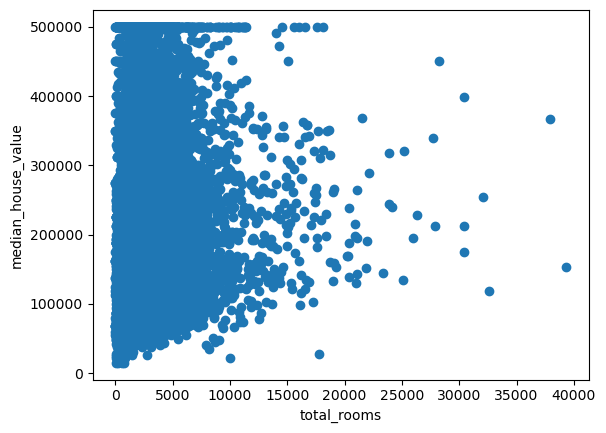

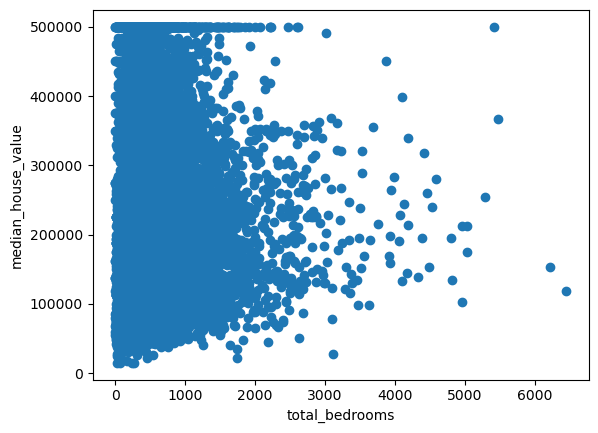

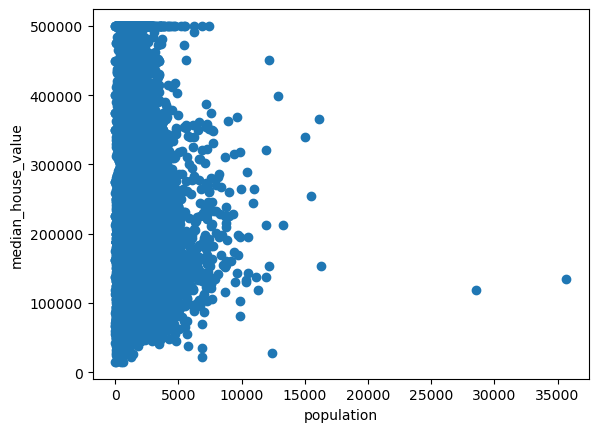

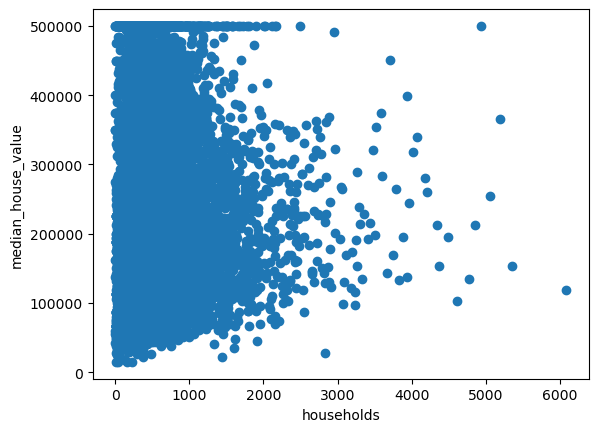

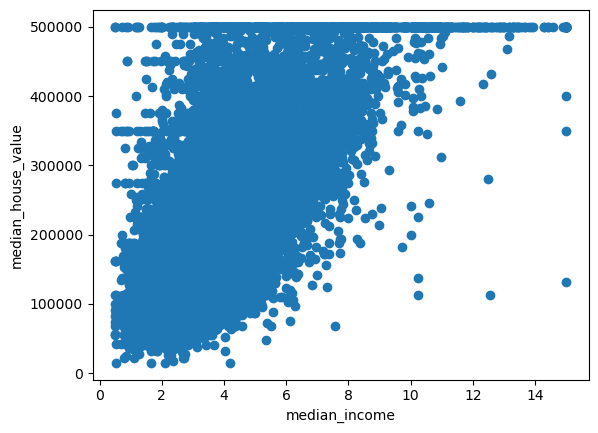

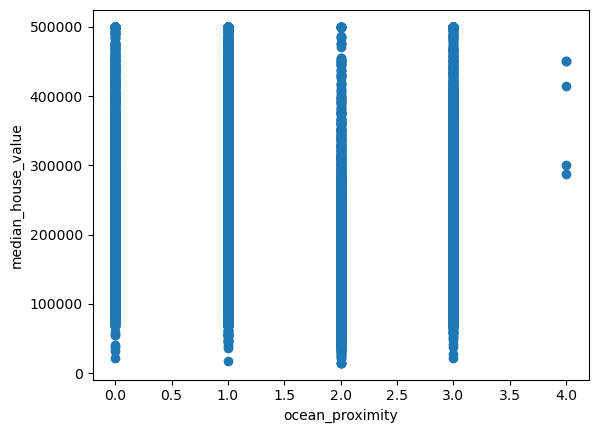

In [18]:
#make plots between 'median house value' and other features
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']
import matplotlib.pyplot as plt
for i in x.columns:
    plt.figure()
    plt.scatter(x[i], y)
    plt.xlabel(i)
    plt.ylabel('median_house_value')
    plt.show()

It is not very clear from the graph, but we can see that there is a positive correlation between the two. So we can say that as the median income increases, the median house value also increases. To get a better idea, we will now use Linear Regression to fit a line to the data and see the value of coefficients for all features.

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
coeff_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])

In [24]:
coeff_df

,Coefficient
longitude,-41832.099626
latitude,-41881.005137
housing_median_age,1146.880531
total_rooms,-7.819068
total_bedrooms,114.970518
population,-38.707457
households,45.894344
median_income,40300.312585
ocean_proximity,-3151.309000


In [25]:
print(lr.intercept_)

-3496010.4626619373


In [26]:
predictions = lr.predict(x_test)

In [27]:
print(f'actual: {y_test.mean()}') #Actual Mean
print(f'predictions: {predictions.mean()}')#Predicted Mean

actual: 205500.30959302327
predictions: 204932.09200701813


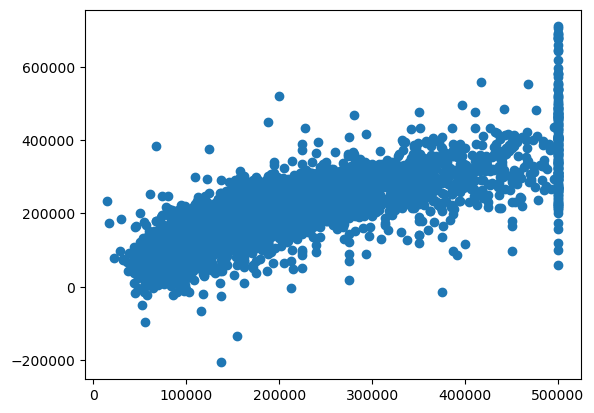

In [28]:
plt.scatter(y_test,predictions)

/tmp/ipykernel_291553/1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


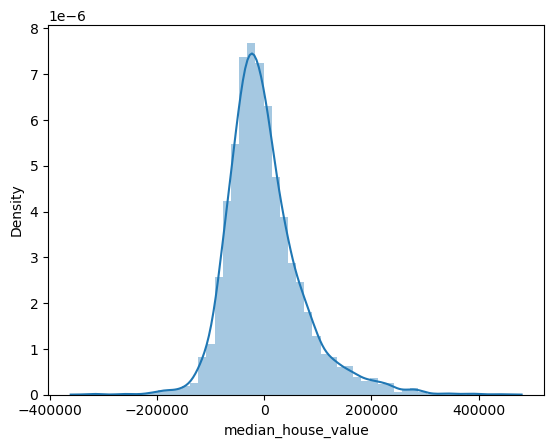

In [29]:
sns.distplot((y_test-predictions),bins=50);

In [30]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 51832.730017410104
MSE: 5050795292.459159
RMSE: 71068.9474556867


Now, let's train other more complicated models and see how they perform, and compare relative performance of all models.

In [31]:
from sklearn.metrics import r2_score

from sklearn import tree, linear_model, ensemble, neighbors

In [36]:
MLA = [
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),

    linear_model.LinearRegression(),
    linear_model.SGDRegressor(),

    ensemble.RandomForestRegressor(),
    ensemble.AdaBoostRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),

    neighbors.KNeighborsRegressor(),
]


In [37]:
MLA_compare = pd.DataFrame()

def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)
        classifier_r2_score = r2_score(y_test, y_pred)

        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'R^2 Score'] = classifier_r2_score*100

        print(MLA_name, "Done")
        row_index+=1

In [38]:
MLA_testing(MLA, x_train, x_test)

DecisionTreeRegressor Done
ExtraTreeRegressor Done
LinearRegression Done
SGDRegressor Done
RandomForestRegressor Done
AdaBoostRegressor Done
ExtraTreesRegressor Done
GradientBoostingRegressor Done
KNeighborsRegressor Done


In [39]:
MLA_compare = MLA_compare.sort_values(
    by="R^2 Score", ascending=False).reset_index(drop=True)[:5]
MLA_compare


,MLA Name,R^2 Score
0,RandomForestRegressor,80.653082
1,ExtraTreesRegressor,79.090120
2,GradientBoostingRegressor,75.771370
3,DecisionTreeRegressor,63.297116
4,LinearRegression,61.456344


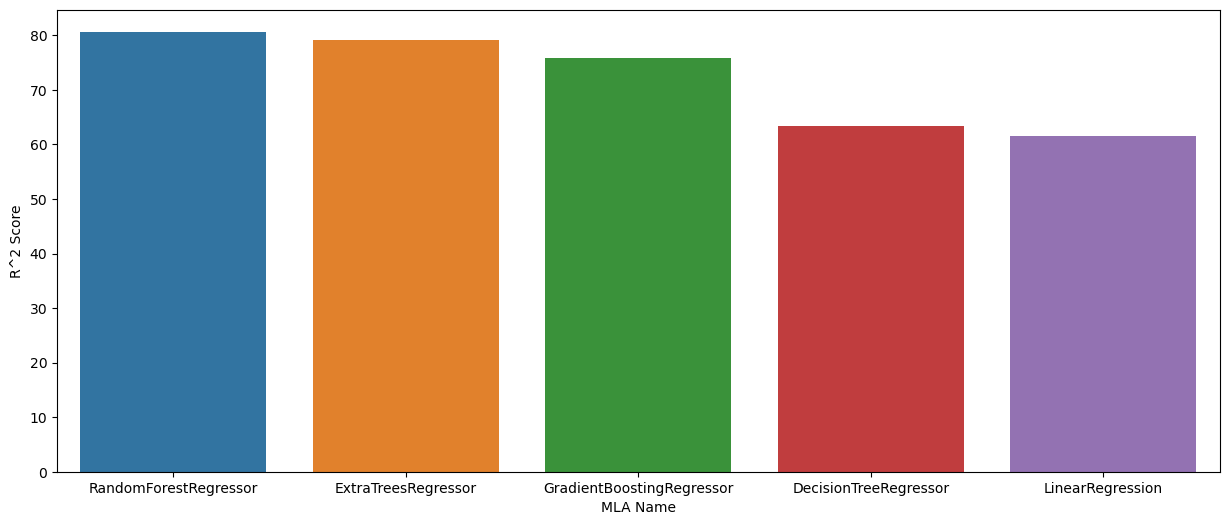

In [40]:
plt.rcParams["figure.figsize"] = (15, 6)
sns.barplot(x="MLA Name", y="R^2 Score", data=MLA_compare)
plt.show("Comparing R^2 scores of Models")
plt.show()


Now, here from the comparison above we can see that other more complicated tree-based models re vastly outperforming the linear regression model. But we can also see that the linear regression model is much easier to interpret. So, depending upon our need, we can choose the model that suits us the best.
So for this problem, we can say that the linear regression model is the best model for us when it comes to understanding the relationship between the features and the target variable. However, when it comes to predicting the price of the house, we can use the tree-based models, like Random Forest Regressor, to get a better accuracy.